In [1]:
#5data node company sales
# Pandas와 Matplotlib를 호출
import pandas as pd
import matplotlib.pyplot as plt

# Sales Data를 변수명 SalesLog에 할당
SalesLog = pd.read_csv('~/aiffel/data_analysis_basic/data/Sales.csv')
SalesLog

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273


In [2]:
# SalesLog 정보 확인
SalesLog.info()
#고객들이 게임을 설치한 일자(install) ,최종 로그기록(Time_stamp),게임명(Game_Name),상태(Status)
# 결제금액(Payment),유저 아이디(Customer_ID)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [3]:
# 결제된 금액 총액 계산하기
SalesLog['Payment'].sum()

144443100

In [6]:
# 결제된 금액 총액 계산하기
a=SalesLog['Payment'].sum()
print(f'결제금액: { a:,}')

결제금액: 144,443,100


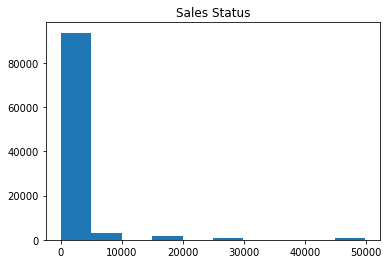

In [7]:
# 결제 금액을 히스토그램으로 그리기
plt.hist(SalesLog['Payment'])
plt.title('Sales Status')
plt.show()

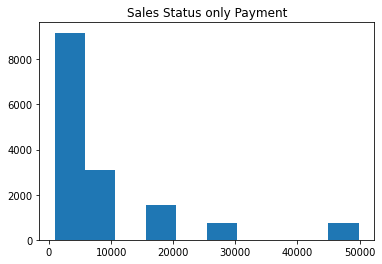

In [8]:
# 결제금액이 0원이 아닌 경우만 골라내서 Sales 변수에 할당
Sales = SalesLog[SalesLog['Payment']!=0]

# 결제 금액을 히스토그램으로 그리기
plt.hist(Sales['Payment'])
plt.title('Sales Status only Payment')
plt.show()

In [9]:
# 결제금액의 기술통계량 확인하기
Sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

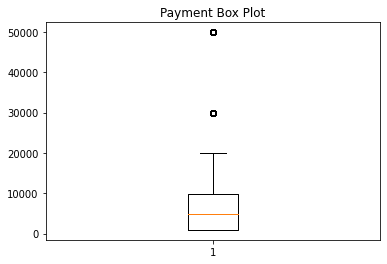

In [10]:
#최솟값은 900원, IQ1(25%)값도 900원, IQ2(중위 값)값은 4,900원, 평균 결제금액은 9,435원으로 분석
plt.boxplot(Sales['Payment'])
plt.title('Payment Box Plot')
plt.show()

In [11]:
#900원 약 35%, 4900원 약 24% , 합이 70%
Sales['Payment'].value_counts()/len(Sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

In [12]:
#1월에는 결제금액이 아예 없고, 2월에 비해 3월 결제금액이 줄었습니다.
# SalesLog에 Month열을 만들고, 월별 날짜값을 입력
SalesLog = SalesLog.copy()
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]

# 월별 결제금액 확인하기
SalesLog['Payment'].groupby(SalesLog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

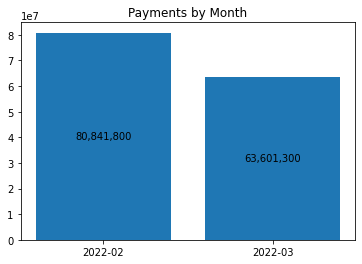

In [13]:
#2월, 3월
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

In [14]:
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02')& (SalesLog['Payment'] != 0)]

In [15]:
# 시각화를 위한 인덱스 정렬하기
Sales02.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


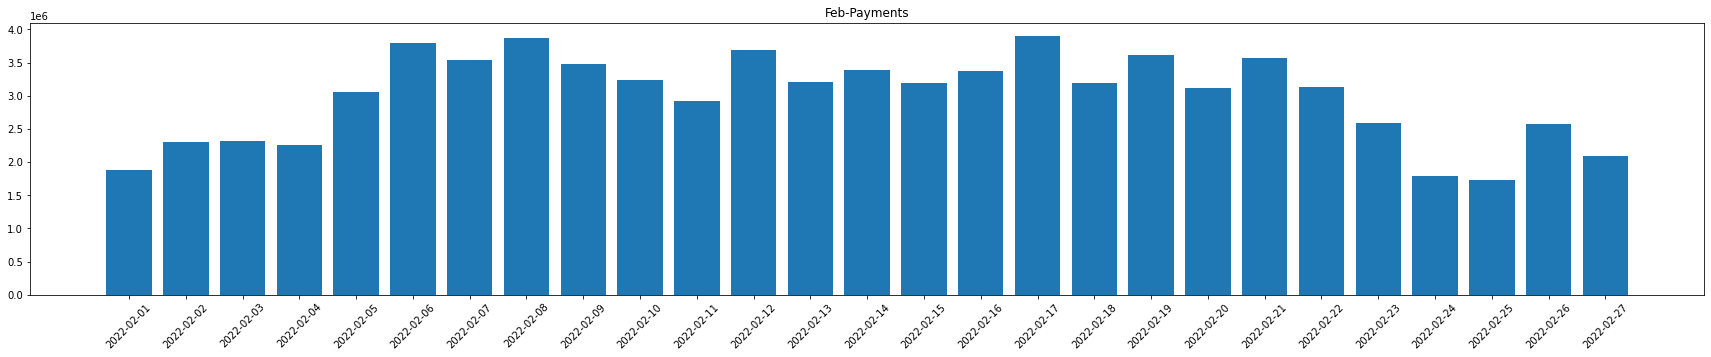

In [16]:
# 2월에 결제한 데이터 시각화하기
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show()

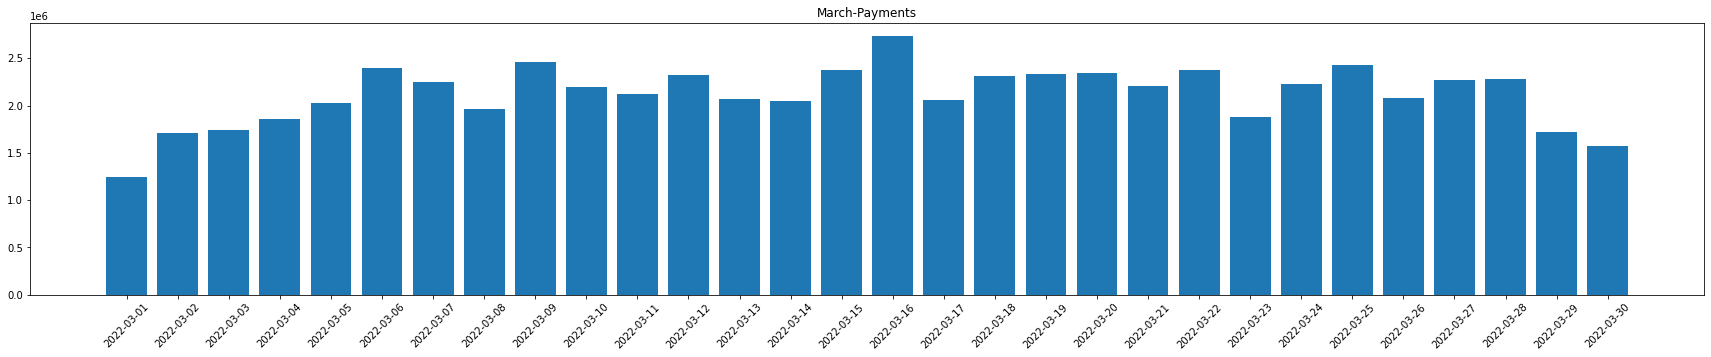

In [17]:
# Sales03변수를 만들고, 3월에 결제한 데이터 할당하기
Sales03 = SalesLog[(SalesLog['Month'] == '2022-03')& (SalesLog['Payment'] != 0)]
# 시각화를 위한 인덱스 정렬하기
Sales03.reset_index(drop=True)
# 3월에 결제한 데이터 시각화하기
temp_data = Sales03['Payment'].groupby(Sales03['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('March-Payments')
plt.xticks(rotation=45)
plt.show()

In [18]:
# CustomerLog data
#유저 아이디(Customer_ID) 고객 이름(Name) 게임 내 닉네임(Nickname) 비밀번호(Password) 고객 이메일(Email)
#고객 생년월일(Birth) 고객 성별(Gender) 고객 휴대폰번호(C.P.) 모바일 서비스 기업(MobileCompany) 모바일 OS(OS)
CustomerLog = pd.read_csv('~/aiffel/data_analysis_basic/data/customer.csv')
print(CustomerLog)

CustomerLog.info()

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

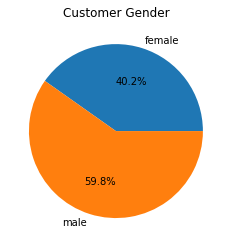

In [19]:
# 고객 성별에 따른 파이그래프 그리기
pie_data = CustomerLog.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

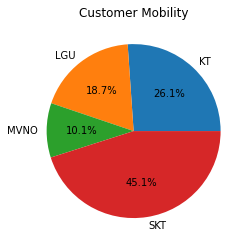

In [21]:
# 고객 모바일 서비스 기업에 따른 파이그래프 그리기
pie_data = CustomerLog.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Mobility')
plt.show()

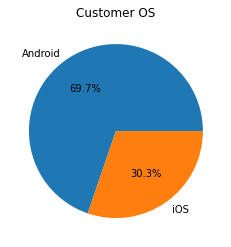

In [22]:
# 고객 모바일OS에 따른 파이그래프 그리기
#남성이 많이 이용하고, 안드로이드를 사용하는 고객
pie_data = CustomerLog.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer OS')
plt.show()

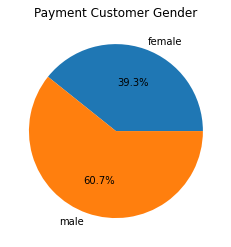

In [23]:
# Customer 데이터와 Sales 데이터를 결합하기
TotalData = pd.merge(CustomerLog, SalesLog)

# 결제 경험이 있는 고객들만 골라내기
PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

# 결제 경험이 있는 고객 성별에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Gender')
plt.show()

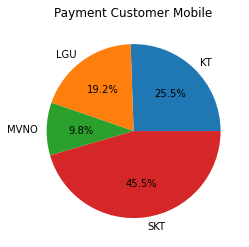

In [24]:
# 결제 경험이 있는 고객 모바일 서비스 기업에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Mobile')
plt.show()

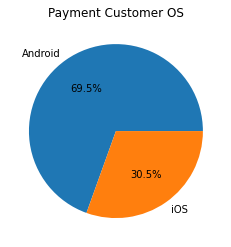

In [25]:
# 결제 경험이 있는 고객 모바일OS에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer OS')
plt.show()

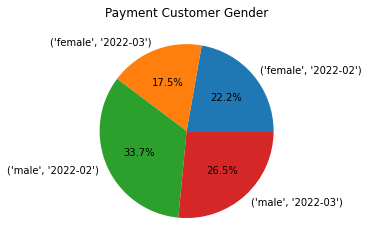

In [28]:
# Hint! groupyby()과 sum()을 사용해 봅시다.
pie_data = PaymentCustomer['Payment'].groupby([PaymentCustomer['Gender'],PaymentCustomer['Month']]).sum()
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Gender')
plt.show()

In [29]:
# Hint! '=='를 사용해 봅시다.
male = PaymentCustomer[PaymentCustomer['Gender'] == 'male']
female = PaymentCustomer[PaymentCustomer['Gender'] == 'female']

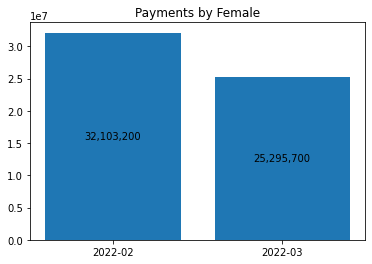

In [30]:
temp_data = female['Payment'].groupby(female['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Female')
plt.show()

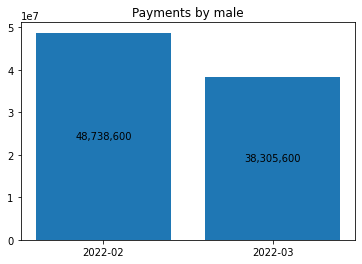

In [31]:
temp_data = male['Payment'].groupby(male['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by male')
plt.show()

In [3]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns


In [4]:
# sales_data 변수를 만들고 각 데이터 값을 할당
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_6.csv')

# 변수 sales_data의 head 값 확인하기
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [6]:
# sales_data의 date열을 만들고 Time_stamp 값의 7번째 값까지 입력 
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [5]:
sales_data['date'].value_counts()

2022-03    50465
2022-02    49380
Name: date, dtype: int64

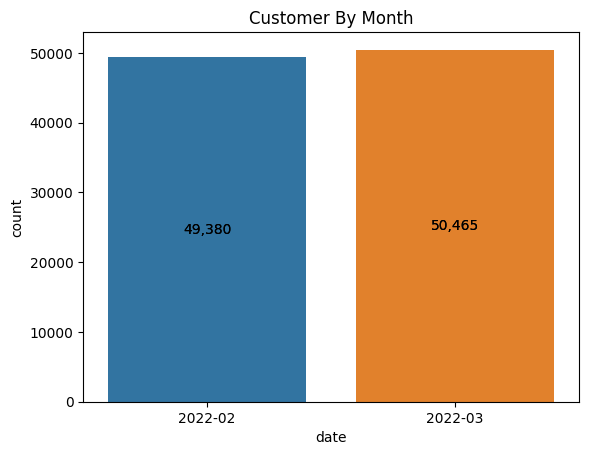

In [6]:
# 월별 고객 수 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()
#2월에 기록한 고객수는 49,380명, 3월은 50,465명으로 오히려 증가 > 매출과 반대 현상 

In [7]:
# 월별 각 게임 고객 수 분류하기  status를 중심으로 월별,게임네임
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

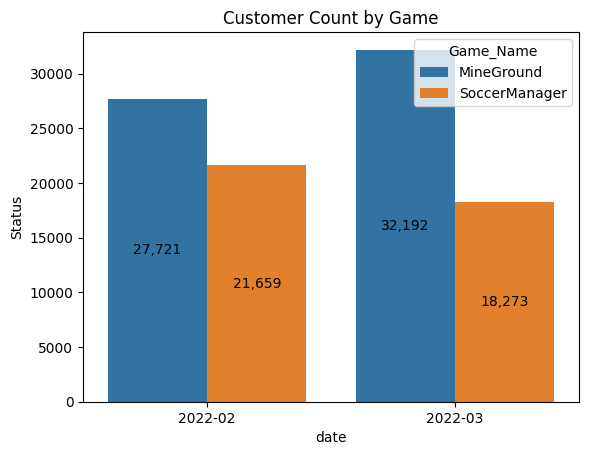

In [8]:
# 월별 각 게임 고객 수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()
#Mine Ground 고객은 2월에 27,721명, 3월 32,192명으로 증가했고,
#Soccer Manager 고객은 2월에 21,659명, 3월 18,273명으로 감소

In [9]:
# sales_data의 Status 열에 포함된 값들의 개수 세어보기
sales_data['Status'].value_counts()

play       84821
install    15024
Name: Status, dtype: int64

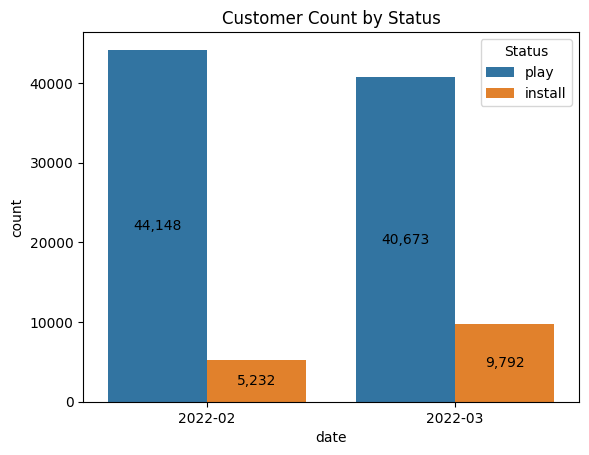

In [10]:
# 코드를 직접 작성해 보세요. 
# hint: hue를 'Status'로 지정해 보세요. 
ax = sns.countplot(data=sales_data, x='date', hue='Status')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Status')
plt.show()
#인스톨한 고객이 기존 5,232명에서 9,792명으로 증가했지만 플레이한 고객은 44,148명에서 40,673명으로 감소

In [9]:
#월별 결제건수
temp_data = sales_data[sales_data['Payment'] !=0]
temp_data['date'].value_counts()

2022-02    8542
2022-03    6898
Name: date, dtype: int64

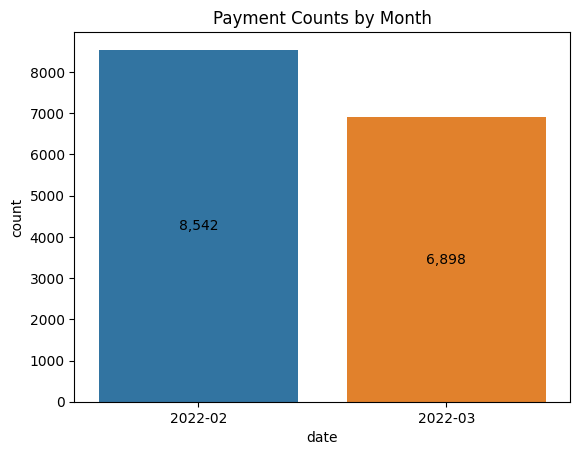

In [10]:
# 월별 결제 횟수 시각화하기
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()

In [11]:
# 각 게임별 결제 건수 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

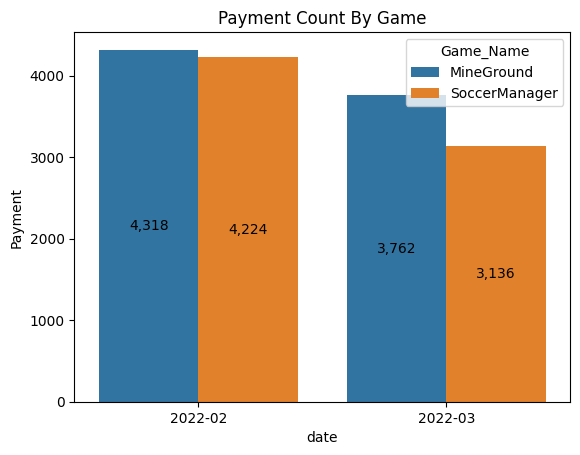

In [12]:
# 각 게임별 결제 건수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()
#Mine Ground와 Soccer Manager 모두 결제 건수와 결제 금액이 줄었다

In [14]:
# player_data변수를 만들고 sales_data에서 Status가 play인 고객들만 골라내 할당하기
player_data = sales_data[sales_data['Status'] == 'play']
player_data
#게임을 설치하고 한번이라도 플레이한 고객들은 총 84,821명인 

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


In [15]:
# plater_data에 install_date열을 만들고, install열 값의 7번째 값까지 입력 칼럼 추가
player_data = player_data.copy()
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]

In [18]:
# plater_data에 type열을 만들고, install_date와 play_date열의 값이 같으면 New Player을 입력, 값이 다르면 Existing을 입력
player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')

In [19]:
# 월별 신규 고객과 기존 고객 현황 세어보기
grouped = player_data['Status'].groupby([player_data['play_date'], player_data['type']]).count()
grouped

play_date  type      
2022-02    Existing      28668
           New Player    15480
2022-03    Existing      28207
           New Player    12466
Name: Status, dtype: int64

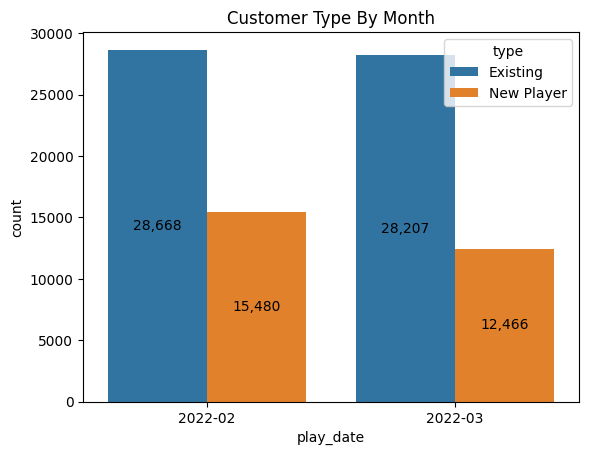

In [20]:
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()
#기존 플레이 고객은 기존 28,668명에서 28,207명으로 461명이 감소했습니다.
#그리고 신규 플레이 고객은 15,480명에서 12,466명으로 3,014명이 감소

In [21]:
# 코드를 직접 작성해 보세요. 
# 월별 신규 고객과 기존 고객의 결제 현황 살펴보기
grouped = player_data['Payment'].groupby([player_data['play_date'], player_data['type']]).sum()
grouped

play_date  type      
2022-02    Existing      50140500
           New Player    30701300
2022-03    Existing      50140500
           New Player    18220700
Name: Payment, dtype: int64

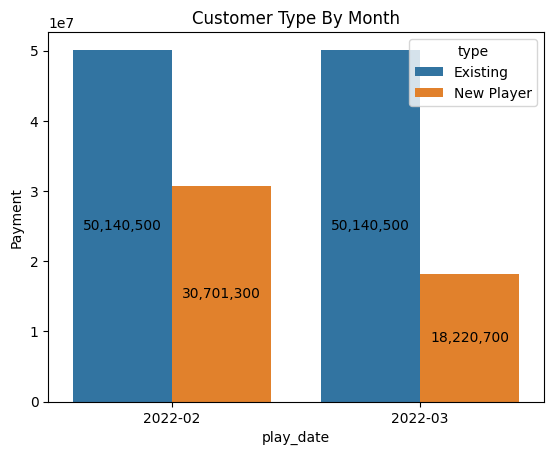

In [22]:
# 각 게임별 결제 금액 월별 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

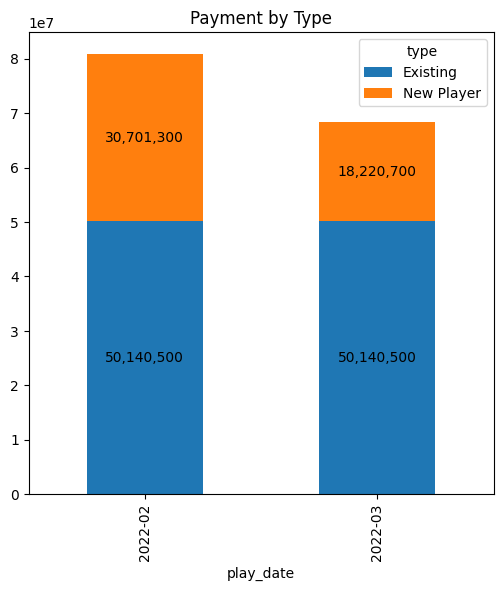

In [23]:
#월별 신규 고객과 기존 고객의 결제 현황 시각화하기(누적막대 보기)
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type')
plt.show()
#우선 기존 고객이 결제한 금액은 50,140,500원 동일합니다.
#하지만 신규 고객이 결제한 금액은 기존 30,701,300원에서 18,220,700원으로 약 40% 수준이 감소

In [24]:
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
Existing,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
Existing,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
Existing,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
Existing,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
Existing,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
New Player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New Player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New Player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [25]:
# 인덱스에서 Existing을 삭제하고 신규 고객들만 남기기
payment_data.drop('Existing', inplace=True)

In [26]:
# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

In [27]:
# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)

In [7]:
# 월별 각 게임 고객 수 분류하기
grouped = sales_data['Game_Name'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Game_Name, dtype: int64

In [ ]:
# 코드를 직접 작성해 보세요. 
player_data = sales_data[sales_data['Status'] == 'play']
player_data

player_data = player_data.copy()
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]

player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')



# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)
payment_data

# 인덱스에서 New_player을 삭제하고 기존 고객들만 남기기
payment_data.drop('New Player', inplace=True)


# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')


# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()


# 고객의 결제이력을 월별로 구분하기
payment_data1_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data1_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values


# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data1_02, payment_data1_03],dtype=object,)


# 기존 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()
